# Imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# ignore convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")

# Data Exploration

In [2]:
og = pd.read_csv("insurance.csv")

In [3]:
og.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
og.shape

(1338, 7)

In [5]:
og.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
og.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Pre-processing

In [7]:
data=[og]

In [8]:
sex = {"male": 0, "female": 1}

for dataset in data:
    dataset['sex'] = dataset['sex'].map(sex)

In [9]:
smoker={"no":0, "yes":1}

for dataset in data:
    dataset['smoker']=dataset['smoker'].map(smoker)

In [10]:
region={"southwest":0,"southeast":1,"northwest":2, "northeast":3}

for dataset in data:
    dataset['region']=dataset['region'].map(region)

In [11]:
og.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [12]:
og.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Data Visualization

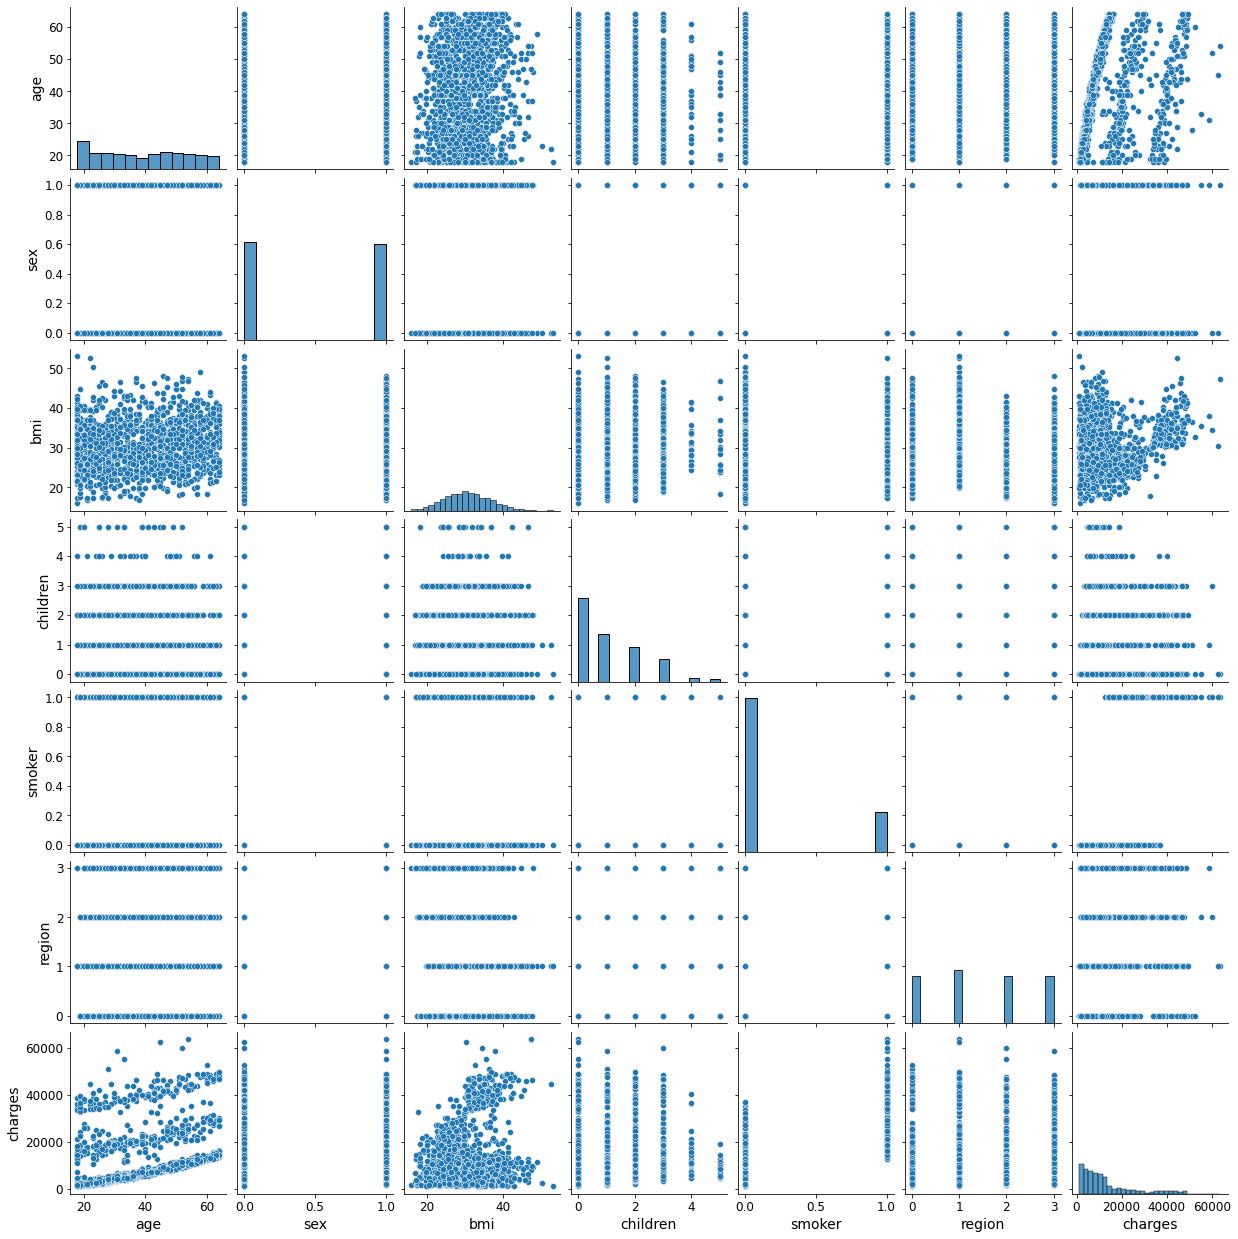

In [13]:
df1=seaborn.pairplot(og)
df1

In [14]:
og.corr()['charges'].sort_values()

sex        -0.057292
region      0.006208
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

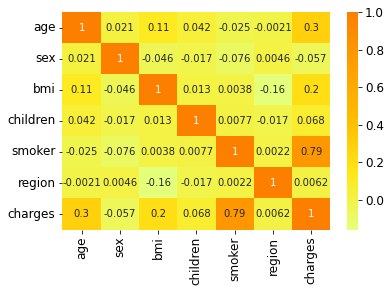

In [15]:
corr = og.corr()
seaborn.heatmap(corr, cmap = 'Wistia', annot= True)

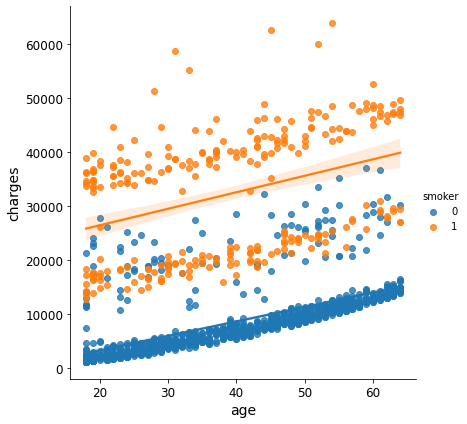

In [16]:
seaborn.lmplot(x="age", y="charges", hue ="smoker", data=og, height = 6)

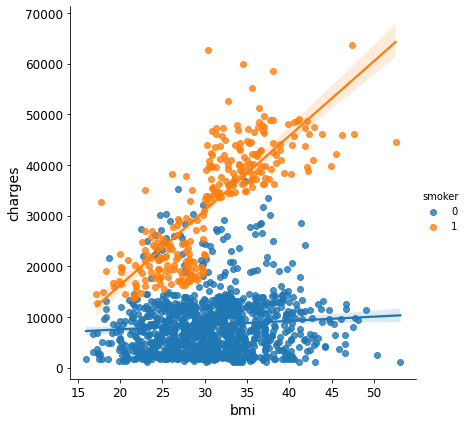

In [17]:
seaborn.lmplot(x="bmi", y="charges", hue="smoker", data=og, height = 6)

# Split Data

In [18]:
X = og.drop(['charges'], axis = 1)
y = og.charges

In [19]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [22]:
X_train

,age,sex,bmi,children,smoker,region
1075,32,1,29.59,1,0,1
131,61,1,22.04,0,0,3
15,19,0,24.60,1,0,0
1223,20,1,24.42,0,1,1
1137,26,1,22.23,0,0,2
...,...,...,...,...,...,...
763,27,0,26.03,0,0,3
835,42,0,35.97,2,0,1
1216,40,0,25.08,0,0,1
559,19,0,35.53,0,0,2


In [23]:
y_train

1075     4562.84210
131     13616.35860
15       1837.23700
1223    26125.67477
1137     3176.28770
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1003, dtype: float64

In [24]:
X_test

,age,sex,bmi,children,smoker,region
578,52,0,30.200,1,0,0
610,47,1,29.370,1,0,1
569,48,0,40.565,2,1,2
1034,61,0,38.380,0,0,2
198,51,1,18.050,0,0,2
...,...,...,...,...,...,...
574,57,1,34.295,2,0,3
1174,29,0,32.110,2,0,2
1327,51,0,30.030,1,0,1
817,23,0,37.100,3,0,0


In [25]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
574     13224.05705
1174     4433.91590
1327     9377.90470
817      3597.59600
1337    29141.36030
Name: charges, Length: 335, dtype: float64

# Model 1: Linear Regression Model

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
print(lin_reg.intercept_, lin_reg.coef_)
print('Training Score from Linear Regression:', lin_reg.score(X_train,y_train))
print('Test Score from Linear Regression:', lin_reg.score(X_test,y_test))

-12281.219903487896 [ 2.50537556e+02 -3.65092141e+00  3.22881906e+02  4.50147445e+02
  2.36021161e+04  3.41244000e+02]
Training Score from Linear Regression: 0.7337162219022217
Test Score from Linear Regression: 0.7962732059725786


# Model 2: Polynomial Regression Model(s)

In [27]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2=poly2.fit_transform(X_test)
poly_reg2=LinearRegression()
poly_reg2.fit(X_train_poly2, y_train)
y_train_pred_poly2 = poly_reg2.predict(X_train_poly2)
y_test_pred_poly2 = poly_reg2.predict(X_test_poly2)
print(poly_reg2.intercept_, poly_reg2.coef_)
print('Training Score from Polynomial Regression - 2nd Degree:', poly_reg2.score(X_train_poly2,y_train))
print('Test Score from Polynomial Regression - 2nd Degree:', poly_reg2.score(X_test_poly2,y_test))

-5904.620248285422 [ 1.07847107e-10  2.05386504e+01  3.94191253e+02  5.00967360e+02
 -5.90075747e+01 -9.55081562e+03 -1.06584269e+03  2.96114360e+00
 -1.19086844e+01  1.10468449e+00  2.64318714e+00  6.60540692e+00
 -1.68107530e+01  3.94191253e+02 -2.60925056e+01  3.60928089e+02
  6.50519404e+02  2.22929574e+02 -9.41720025e+00  1.86078852e+01
  1.41103897e+03  4.78423747e+01 -1.06651696e+02 -4.64263121e+02
  2.28480225e+02 -9.55081562e+03 -2.37345523e+02  1.46726490e+02]
Training Score from Polynomial Regression - 2nd Degree: 0.831480879537759
Test Score from Polynomial Regression - 2nd Degree: 0.8846283666147685


In [28]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3=poly3.fit_transform(X_test)
poly_reg3=LinearRegression()
poly_reg3.fit(X_train_poly3, y_train)
y_train_pred_poly3 = poly_reg3.predict(X_train_poly3)
y_test_pred_poly3 = poly_reg3.predict(X_test_poly3)
print(poly_reg3.intercept_, poly_reg3.coef_)
print('Training Score from Polynomial Regression - 3rd Degree:', poly_reg3.score(X_train_poly3,y_train))
print('Test Score from Polynomial Regression - 3rd Degree:', poly_reg3.score(X_test_poly3,y_test))

17919.16845152271 [-8.46696776e-08  1.82639749e+02  3.33853221e+03 -2.30171332e+03
 -8.96768887e+02 -1.34252912e+04  1.49946275e+03  7.61685583e+00
 -8.25714959e+01 -1.41794502e+01 -1.99911043e+02  2.06804324e+02
  1.13553324e+01  3.33853221e+03 -1.97188309e+02  8.71748267e+02
 -1.73359592e+02 -6.84053103e+02  9.14770173e+01  2.43779840e+02
  1.06988457e+03 -1.28836148e+02 -1.22553270e+02  7.29159366e+02
  8.61521783e+02 -1.34252912e+04  5.90489514e+02  3.24492844e+02
 -4.68475291e-02  3.60048747e-01  2.57723751e-02  1.97274793e+00
 -5.76797075e+00 -2.83411753e-01 -8.25714959e+01  6.16801814e+00
 -8.02447831e+00 -1.20397973e+02 -2.24762609e+01  6.21572806e-02
  1.71026356e+00  5.08628256e+00  1.27473815e+00  5.40299326e+00
 -1.88038143e+01 -1.65257681e+01  2.06804324e+02 -2.03949806e+01
 -7.77313360e+00  3.33853221e+03 -1.97188309e+02  8.71748267e+02
 -1.73359592e+02 -6.84053103e+02  6.60955432e-01 -3.75198787e+01
  1.57806853e+02  3.92305958e+01  5.77388018e+00  7.99583469e+01
 -2.331

In [29]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4=poly4.fit_transform(X_test)
poly_reg4=LinearRegression()
poly_reg4.fit(X_train_poly4, y_train)
y_train_pred_poly4 = poly_reg4.predict(X_train_poly4)
y_test_pred_poly4 = poly_reg4.predict(X_test_poly4)
print(poly_reg4.intercept_, poly_reg4.coef_)
print('Training Score from Polynomial Regression - 4th Degree:', poly_reg4.score(X_train_poly4,y_train))
print('Test Score from Polynomial Regression - 4th Degree:', poly_reg4.score(X_test_poly4,y_test))

31334.43995816204 [ 3.52664170e-05  2.87483166e+03 -3.49250960e+03 -9.28964752e+03
  2.79605905e+04  3.86479362e+04  4.13397858e+04 -7.11252186e+01
  2.84908438e+02 -6.75374078e+01 -4.90564471e+02 -6.84565179e+02
 -3.94963856e+02 -3.49250959e+03  4.53448777e+02 -5.10993115e+03
  5.40652980e+03 -1.29419025e+03  5.46140216e+02 -2.33303113e+03
 -4.85300917e+03 -3.71061433e+03  5.76574642e+03 -8.22525246e+02
 -5.69542793e+03  3.86479362e+04 -2.90027034e+03  1.32408779e+04
  4.52173733e-01 -4.04195174e+00  2.65081820e+00  4.69350488e+00
  1.00121608e+01  1.38206908e+01  2.84908442e+02 -2.19257895e+01
  4.94618150e+01 -1.76395753e+02  9.72726098e+00 -1.11950516e+00
  6.77812139e+00  5.58060310e+01 -1.12690998e+01  3.37177338e+01
 -9.94621489e+01  6.38108193e+01 -6.84565180e+02  1.12942985e+02
 -3.27848198e+00 -3.49250959e+03  4.53448779e+02 -5.10993115e+03
  5.40652980e+03 -1.29419025e+03 -2.02832858e+01  4.03228853e+02
 -4.50468287e+02  5.22219787e+01 -1.76378296e+02  3.12732803e+03
  1.099

# Comparing Models

In [30]:
predictions = pd.DataFrame({'Actual': y_test, 'Linear Model Prediction': y_test_pred, 'Polynomial Model Predition - 2nd Degree': y_test_pred_poly2, 'Polynomial Model Predition - 3rd Degree': y_test_pred_poly3, 'Polynomial Model Predition - 4th Degree': y_test_pred_poly4})
predictions

,Actual,Linear Model Prediction,Polynomial Model Predition - 2nd Degree,Polynomial Model Predition - 3rd Degree,Polynomial Model Predition - 4th Degree
578,9724.53000,10947.914015,11979.213938,10869.392745,11515.131164
610,8547.69130,9764.827331,10192.589978,9752.149135,9887.423200
569,45702.02235,38027.186254,48786.769607,48645.472435,49985.216537
1034,12950.07120,16076.266564,14384.968914,13643.892510,12955.452479
198,9644.25250,7003.050939,8459.578713,12305.773454,14638.882658
...,...,...,...,...,...
574,13224.05705,14993.031723,16330.877542,16877.654933,16902.112481
1174,4433.91590,6934.890107,6856.667781,7893.765276,8971.267186
1327,9377.90470,10983.730535,11504.913218,11308.679539,11409.597238
817,3597.59600,6810.504924,3817.350960,5306.517322,5087.907579


# Comparing Models - Linear Regression

In [31]:
mse_lin=sklearn.metrics.mean_squared_error(y_test, y_test_pred)
rmse_lin = math.sqrt(mse_lin)
print('Training Score from Linear Regression:', lin_reg.score(X_train,y_train))
print('Test Score from Linear Regression:', lin_reg.score(X_test,y_test))
print('The RMSE for the Linear Regression model is',rmse_lin)

Training Score from Linear Regression: 0.7337162219022217
Test Score from Linear Regression: 0.7962732059725786
The RMSE for the Linear Regression model is 5663.358417062195


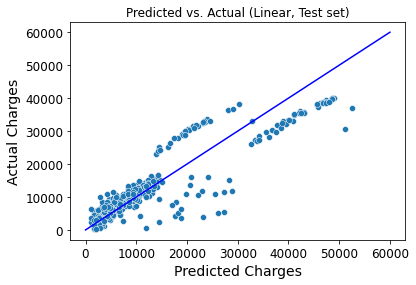

In [32]:
seaborn.scatterplot(x=y_test, y=y_test_pred)

plt.title("Predicted vs. Actual (Linear, Test set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

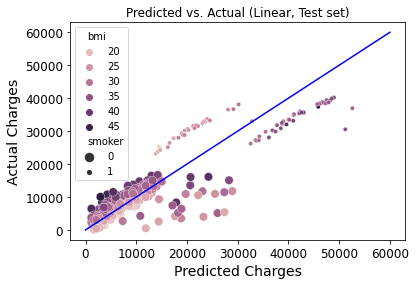

In [33]:
seaborn.scatterplot(x=y_test, y=y_test_pred, hue="bmi", size= 'smoker', data=X_test)

plt.title("Predicted vs. Actual (Linear, Test set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

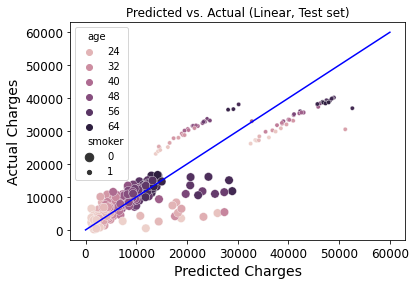

In [34]:
seaborn.scatterplot(x=y_test, y=y_test_pred, hue="age", size= 'smoker', data=X_test)

plt.title("Predicted vs. Actual (Linear, Test set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

# Comparing Models - Polynomial Regression

In [35]:
mse_poly2=sklearn.metrics.mean_squared_error(y_test, y_test_pred_poly2)
rmse_poly2 = math.sqrt(mse_poly2)
print('Training Score from Polynomial Regression - 2nd Degree:', poly_reg2.score(X_train_poly2,y_train))
print('Test Score from Polynomial Regression - 2nd Degree:', poly_reg2.score(X_test_poly2,y_test))
print('The RMSE for the polynomial regression model is',rmse_poly2)

Training Score from Polynomial Regression - 2nd Degree: 0.831480879537759
Test Score from Polynomial Regression - 2nd Degree: 0.8846283666147685
The RMSE for the polynomial regression model is 4261.863077559623


In [36]:
mse_poly3=sklearn.metrics.mean_squared_error(y_test, y_test_pred_poly3)
rmse_poly3 = math.sqrt(mse_poly3)
print('Training Score from Polynomial Regression - 3rd Degree:', poly_reg3.score(X_train_poly3,y_train))
print('Test Score from Polynomial Regression - 3rd Degree:', poly_reg3.score(X_test_poly3,y_test))
print('The RMSE for the polynomial regression model is',rmse_poly3)

Training Score from Polynomial Regression - 3rd Degree: 0.8417150423014843
Test Score from Polynomial Regression - 3rd Degree: 0.8790556036527927
The RMSE for the polynomial regression model is 4363.579048634555


In [37]:
mse_poly4=sklearn.metrics.mean_squared_error(y_test, y_test_pred_poly4)
rmse_poly4 = math.sqrt(mse_poly4)
print('Training Score from Polynomial Regression - 4th Degree:', poly_reg4.score(X_train_poly4,y_train))
print('Test Score from Polynomial Regression - 4th Degree:', poly_reg4.score(X_test_poly4,y_test))
print('The RMSE for the polynomial regression model is',rmse_poly4)

Training Score from Polynomial Regression - 4th Degree: 0.8564731331593108
Test Score from Polynomial Regression - 4th Degree: 0.8578909969517866
The RMSE for the polynomial regression model is 4729.9959469391915


# Additional Exploration

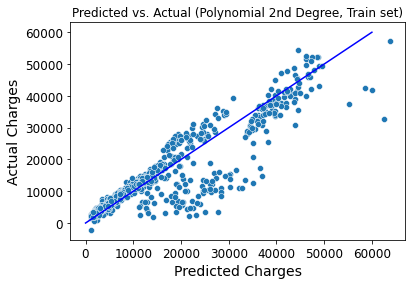

In [38]:
seaborn.scatterplot(x=y_train, y=y_train_pred_poly2)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Train set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

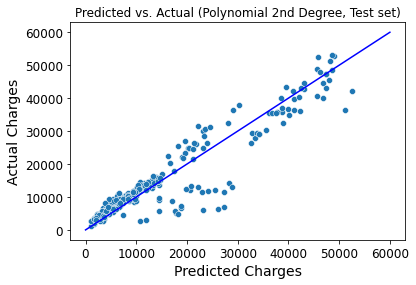

In [39]:
seaborn.scatterplot(x=y_test, y=y_test_pred_poly2)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Test set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

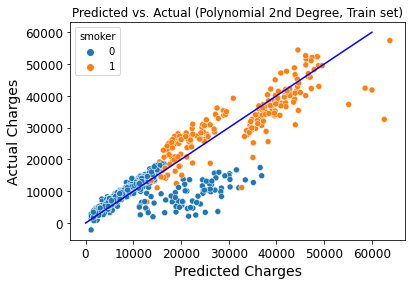

In [40]:
seaborn.scatterplot(x=y_train, y=y_train_pred_poly2, hue="smoker", data =X_train)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Train set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

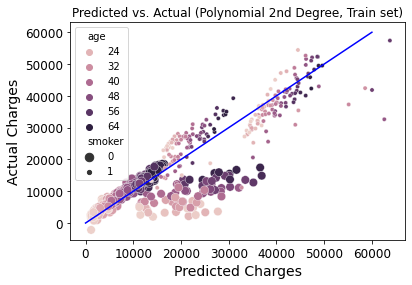

In [41]:
seaborn.scatterplot(x=y_train, y=y_train_pred_poly2, hue="age", size="smoker", data =X_train)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Train set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

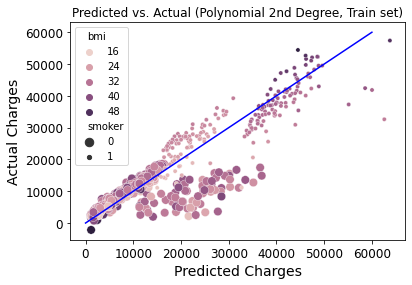

In [42]:
seaborn.scatterplot(x=y_train, y=y_train_pred_poly2, hue="bmi", size="smoker", data =X_train)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Train set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

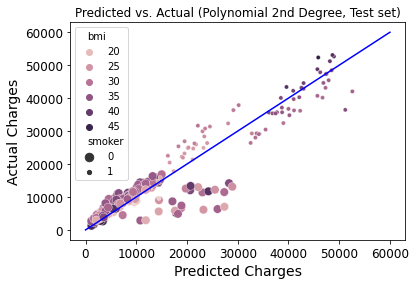

In [43]:
seaborn.scatterplot(x=y_test, y=y_test_pred_poly2, hue="bmi", size="smoker", data=X_test)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Test set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()

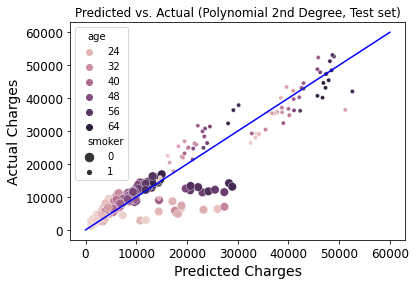

In [44]:
seaborn.scatterplot(x=y_test, y=y_test_pred_poly2, hue="age", size="smoker", data=X_test)

plt.title("Predicted vs. Actual (Polynomial 2nd Degree, Test set)")
plt.xlabel("Predicted Charges")
plt.ylabel("Actual Charges")

x = np.linspace(0,60000,100)
y = x
plt.plot(x, y, '-b')

plt.show()